# Guia 3
## Variables condicionadas
### Ejercicio 1
Sabiendo la condición de que $X=x$ nos dice que de 100 televisores, hay exactamente $x$ fallados. Como cada falla es detectada con probabilidad 0.8 (de forma independiente) observo que $Y|X=x \sim Bin(x,0.8)$. 

Para simular, voy a suponer que era 10 televisores nada más, sino es un plomo de gráfocos. Observar que, en este caso,  $X\sim Bin(10,0.1)$.

**Bonus**: Por qué para valores más grandes de $x$ la estimación de la función de probabilidad de $Y|X=x$ empeora?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

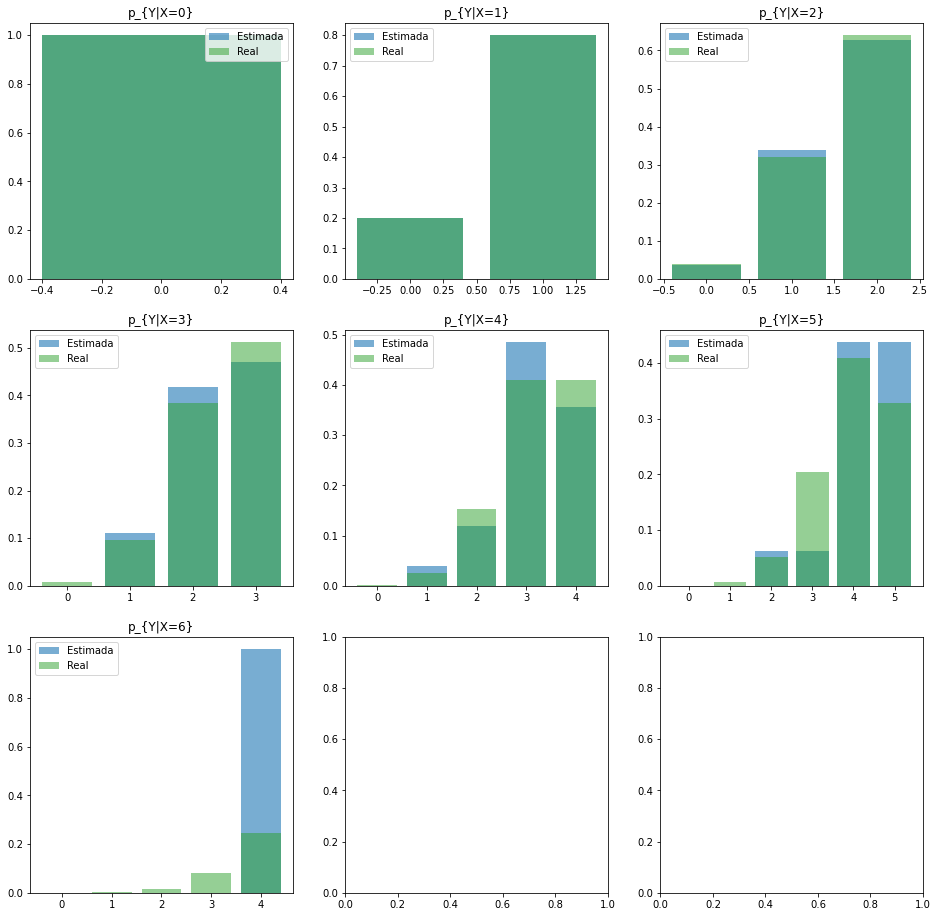

In [2]:
X1 = np.random.binomial(10,0.1, size=10000)# Genero las x
Xmax = np.max(X1)
Y1 = np.random.binomial(X1,0.8)# Para cada elemento en X, me genera una binomial de parámetros n=Xi,p=0.8
fig, ax = plt.subplots((Xmax//3)+1,3, figsize=(16,16))
# Para cada uno de los valores de X observados (unicos), calculo la funcion de proba estimada para Y|X=x: 
# filro las filas de Y donde X=xi, y en base a esas filas armo la pmf. Luegp superpongo la pmf verdadera.
for x in range(Xmax+1):
    ax[x//3, x%3].bar(np.arange(max(Y1[X1==x])+1), np.bincount(Y1[X1==x])/sum(X1==x), label = 'Estimada', 
                      alpha = 0.6, color='C0')
    ax[x//3, x%3].bar(np.arange(max(Y1[X1==x])+1), stats.binom.pmf(np.arange(max(Y1[X1==x])+1),n=x,p=0.8),
                      alpha = 0.5,label = 'Real', color = 'C2')
    ax[x//3, x%3].set_title('p_{Y|X='+str(x)+'}')
    ax[x//3, x%3].legend()
    

### Ejercicio 4
Mirando fijo la densidad, observó que $f_{X,Y} (x,y) = \underbrace{\lambda e^{-\lambda x} \mathbf{I}\{x>0\}}_{X\sim\mathcal{E}(\lambda)}$ $\underbrace{\mu e^{-\mu x} y^{-(1+\mu)}\mathbf{I}\{y>e^{-x}\}}_{f_{Y|X=x}(y)}$. Se puede verificar que efectivamente $\int_{e^{-x}}^\infty \mu e^{-\mu x} y^{-(1+\mu)} dy = 1, x>0$.

Otro camino sería calcular por definicion la marginal de $X$: $f_X(x) = \int_{e^{-x}}^\infty \lambda e^{-\lambda x} \mu e^{-\mu x} y^{-(1+\mu)} dy = \lambda e^{-\lambda x} \mathbf{I}\{x>0\}$, y luego usar que $f_{Y|X=x} = \frac{f_{X,Y}(x,y)}{f_X(x)}$ y llegamos al mismo resulado.

**Observación: $Y|X=x \sim Pareto(\mu, e^{-x})$.**

Simulo para $\lambda=5,\ \mu=5$


Text(0.5, 1.0, 'Scatterplot Ej4')

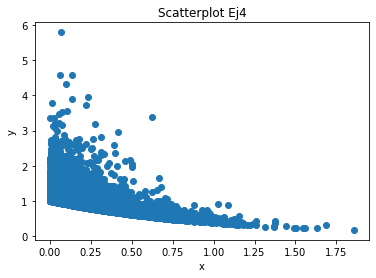

In [3]:
x4 = np.random.exponential(scale=1/5, size=10000)
y4 = stats.pareto.rvs(b=5,size=x4.size)*np.exp(-x4) #genero los Y|X=x 
plt.scatter(x4,y4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot Ej4')

### Ejercicio 4 
$X|S=s\sim \mathcal{N}(s, 0.8)$. Luego usando la fórmula de Bayes para mezclas,
$$\begin{align} 
\mathbb{P}(S=1|X=0.7532) &= \frac{f_{X|S=1}(0.7532)\mathbb{P}(S=1)}{f_{X|S=0}(0.7532)\mathbb{P}(S=0) + f_{X|S=1}(0.7532)\mathbb{P}(S=1)}\\
 & = \frac{ \frac{1}{\sqrt{2\pi}}e^{-(0.7532-1)^2/2}0.6}{\frac{1}{\sqrt{2\pi}}e^{-(0.7532-0)^2/2}0.4 +\frac{1}{\sqrt{2\pi}}e^{-(0.7532-1)^2/2}0.6}
 \end{align}$$

In [4]:
proba = stats.norm.pdf(0.7532,1,np.sqrt(0.8))*0.6/(stats.norm.pdf(0.7532,1,np.sqrt(0.8))*0.6 + stats.norm.pdf(0.7532,0,np.sqrt(0.8))*0.4)
proba

0.6730396004028399

## Esperanza condicional
### Ejercicio 1
$Y|X=x \sim Bin(x,0.8),\quad X\sim Bin(100,0.1)$. Dado que $Y|X=x$ tiene distribución conocida puedo simplemente buscar su esperanza en la tabla .En este caso $\mathbb{E}[Y|X=x] = x 0.8$ Uso las simulaciones de antes.

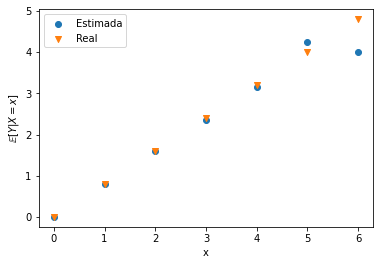

In [5]:
E_Ygivenx1 = np.zeros(len(np.unique(X1)))
for x in np.unique(X1):
    E_Ygivenx1[x] = np.mean(Y1[X1==x])
plt.scatter(np.unique(X1), E_Ygivenx1, label = 'Estimada')
plt.scatter(np.unique(X1), np.unique(X1)*0.8, label='Real', marker='v') 
plt.xlabel('x')
plt.ylabel('$\mathbb{E}[Y|X=x]$')
plt.legend()


$Y|X=x\sim Pareto(5,e^{-x}),\quad X\sim\mathcal{E}(5)$. De la tabla de distribuciones,observo que $\mathbb{E}[Y|X=x] = 5e^{-x}/4$.

En este caso no es tan simple estimar la esperanza. Lo que hacemos es considerar un entorno alrededor de cada $x_0$, $(x_0-h, x0+h)$, y calculamos el promedio con las observaciones de $Y$ correspondientes a pares $(x,y)\ /\  x_0-h<x<x_0+h$. Nuevamente, este $h$ va a representar una solución de compromiso entre sesgo y varianza.

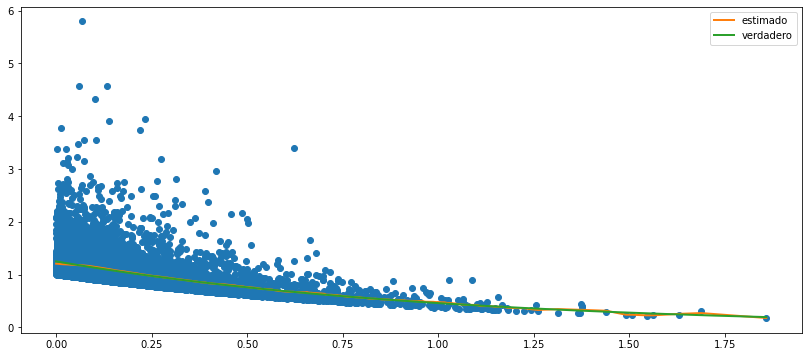

In [9]:
h = 0.08
E_ygivenx4 = np.zeros(len(np.unique(x4)))
for n,x in enumerate(np.unique(x4)):
    E_ygivenx4[n] = np.mean(y4[(x4>x-h)&(x4<x+h)])
plt.figure(figsize=(14,6))
plt.scatter((x4), y4)
plt.plot((np.unique(x4)), E_ygivenx4, color='C1',linewidth=2, label='estimado')
plt.plot((np.linspace(0,max(x4),10000)), 5/4*np.exp(-np.linspace(0,max(x4),10000)), color='C2',linewidth=2 , label='verdadero')
plt.legend()

Cambio la escala del exe x para ver la relación lineal

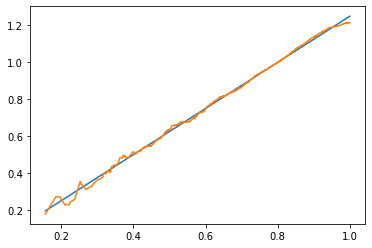

In [7]:
plt.plot(np.exp(-np.linspace(0,max(x4),10000)), 5/4*np.exp(-np.linspace(0,max(x4),10000)) )
plt.plot(np.exp(-np.unique(x4)), E_ygivenx4)

### Ejercicio 4
Se que $Y|X=x \sim \mathcal{E}\left(\frac{1}{2+3x}\right)$ y $X\sim\mathcal{U}(0,10)$. Luego 
- $\mathbb{E}[Y|X=x] = 2+3x \Rightarrow \mathbb{E}[Y|X] = 2+3X$
- $var(Y|X=x) = (2+3x)^2 \Rightarrow \mathbb{V}(Y|X) = (2+3X)^2 = 4 + 9X^2 +12X$

Aplicando Pitágoras: $var(Y) = \mathbb{E}[\mathbb{V}(Y|X)] + var(\mathbb{E}[Y|X])$

Como $X\sim\mathcal{U}(0,10)$, $\mathbb{E}[X] = 5,\ var(X)=\frac{100}{12}$. Además recuerdo que $var(X) = \mathbb{E}[X^2]-\mathbb{E}[X]^2 \rightarrow \mathbb{E}[X^2] = var(X) + \mathbb{E}[X]^2$
- $\mathbb{E}[\mathbb{V}(Y|X)] = \mathbb{E}[4+9X^2 +12X] = 4 + 9(\frac{100}{12}+5^2) + 12\,5= 364$
- $var(\mathbb{E}(Y|X)) = var(2+3X) = 9 var(X) = 9\frac{100}{12} = 75$

$var(Y) = 75+ 334 = 439$
Calculo por simulación

In [67]:
X = stats.uniform.rvs(0,10,size=100000)
Y = stats.expon.rvs(scale=(2+3*X))
Y.std()**2


439.40749725288424